In [1]:
import graph_tool.all as gt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/opt/homebrew/Cellar/graph-tool/2.97_1/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:1553: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [2]:
G_Wiki = gt.load_graph("data/G_wiki.gt") 

***
## Descriptives

In [4]:
Max_edges = (G_Wiki.num_vertices()*G_Wiki.num_vertices())-G_Wiki.num_vertices()
Density = G_Wiki.num_edges()/Max_edges

dist, ends = gt.pseudo_diameter(G_Wiki)

In [24]:
Wiki_metrics = {
    "Nodes" : G_Wiki.num_vertices(),
    "Edges" : G_Wiki.num_edges(),
    "Density" : Density,
    "Reciprocity" : gt.edge_reciprocity(G_Wiki),
    "Global Clustering" : gt.global_clustering(G_Wiki)[0],
    "Pseudo-Diameter": dist
}

Wiki_metrics_df = pd.DataFrame(list(Wiki_metrics.items()), columns=['Metric', 'Value'])
Wiki_metrics_df.to_csv('/Users/ramius/Desktop/CodeVault/01_Project/Uni/DLSS_DeepLearningforSocialScientists/Final_Project/DLSS-WAQP/2_FinalReport/Tables/Wiki_metrics.csv', index=False)

In [ ]:
Wiki_homophily = {
    "Degree" : gt.assortativity(G_Wiki,"total")[0],
    "Quality" : gt.assortativity(G_Wiki, G_Wiki.vp["Target_QC_cat"])[0],    
    "Quality Aggregated" : gt.assortativity(G_Wiki, G_Wiki.vp["Target_QC_aggcat"])[0],
    "Scalar Quality" : gt.scalar_assortativity(G_Wiki, G_Wiki.vp["Target_QC_cat"])[0],
    "Scalar Quality (Log)" : gt.scalar_assortativity(G_Wiki, G_Wiki.vp["Target_QC_numlog"])[0],
}

Wiki_homophily_df = pd.DataFrame(list(Wiki_homophily.items()), columns=['Assortativity', 'Value'])
Wiki_homophily_df.to_csv('/Users/ramius/Desktop/CodeVault/01_Project/Uni/DLSS_DeepLearningforSocialScientists/Final_Project/DLSS-WAQP/2_FinalReport/Tables/Wiki_assortativity.csv', index=False)

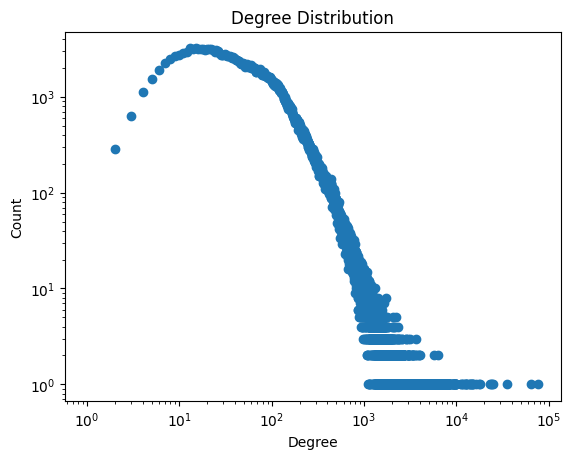

In [7]:
import numpy as np
# Get degree counts
hist = gt.vertex_hist(G_Wiki, "total")

# Plot on log-log scale
plt.loglog(hist[1][:-1], hist[0], 'o')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

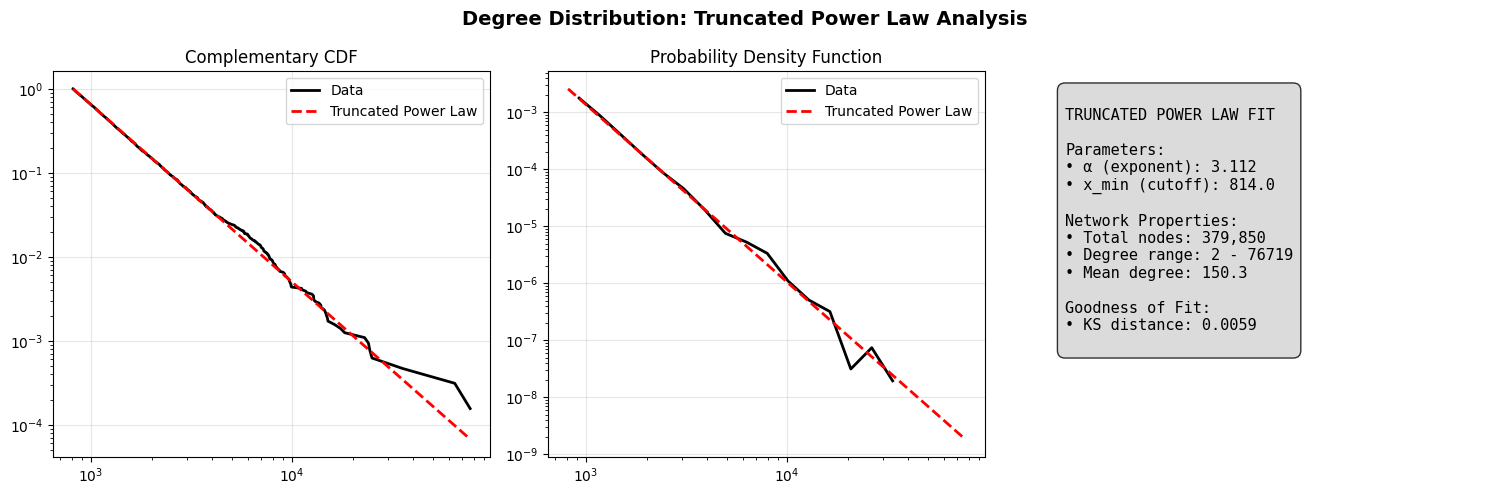

In [30]:
import powerlaw
import numpy as np
import matplotlib.pyplot as plt

# Get degree sequence
degrees = []
for v in G_Wiki.vertices():
    degrees.append(v.out_degree() + v.in_degree())
degrees = np.array(degrees)
degrees = degrees[degrees > 0]  # Remove zeros

# Fit truncated power law
fit = powerlaw.Fit(degrees, discrete=True, verbose=False)

# Create single comprehensive plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# 1. CCDF with fit
fit.plot_ccdf(ax=ax1, color='black', linewidth=2, label='Data')
fit.power_law.plot_ccdf(ax=ax1, color='red', linestyle='--', 
                                  linewidth=2, label='Truncated Power Law')
ax1.set_title('Complementary CDF')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. PDF with fit  
fit.plot_pdf(ax=ax2, color='black', linewidth=2)
fit.power_law.plot_pdf(ax=ax2, color='red', linestyle='--', linewidth=2)
ax2.set_title('Probability Density Function')
ax2.legend(['Data', 'Truncated Power Law'])
ax2.grid(True, alpha=0.3)

# 3. Summary statistics
ax3.axis('off')
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin
ks_distance = fit.power_law.D

summary_text = f"""
TRUNCATED POWER LAW FIT

Parameters:
• α (exponent): {alpha:.3f}
• x_min (cutoff): {xmin}

Network Properties:
• Total nodes: {len(degrees):,}
• Degree range: {degrees.min()} - {degrees.max()}
• Mean degree: {degrees.mean():.1f}

Goodness of Fit:
• KS distance: {ks_distance:.4f}
"""

ax3.text(0.05, 0.95, summary_text, transform=ax3.transAxes, 
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

plt.suptitle('Degree Distribution: Truncated Power Law Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("/Users/ramius/Desktop/CodeVault/01_Project/Uni/DLSS_DeepLearningforSocialScientists/Final_Project/DLSS-WAQP/2_FinalReport/Images/Degree_PowerLaw.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Transition probabilties from classes 